In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
# importing utility functions
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

module_path = os.path.abspath(os.path.join( 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from nb_modules import eda 

In [3]:
building_df = pd.read_pickle('data/pickles/building_df.pkl')

In [4]:
building_df.shape

(762106, 55)

In [5]:
building_df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,legal_ownership_status_num
0,120101000011,12,7,3,1,9,288,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,1
1,120101000021,12,7,3,1,15,364,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,1
2,120101000031,12,7,3,1,20,384,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,1
3,120101000041,12,7,3,1,20,312,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,1
4,120101000051,12,7,3,1,30,308,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,1


In [6]:
building_df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'land_surface_condition_num', 'foundation_type_num', 'roof_type_num',
       'ground_floor_type_num', 'other_floor_type_num', 'position_num',
       'plan_configuration_num', 'target', 'has_geotechnical_risk',
       'has_geotechnical_risk_land_settlement',
  

In [7]:
secondary_use_list = ['has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other']

{'has_secondary_use': 92364, 'has_secondary_use_agriculture': 54764, 'has_secondary_use_hotel': 26742, 'has_secondary_use_rental': 6298, 'has_secondary_use_institution': 885, 'has_secondary_use_school': 323, 'has_secondary_use_industry': 887, 'has_secondary_use_health_post': 173, 'has_secondary_use_gov_office': 142, 'has_secondary_use_use_police': 74, 'has_secondary_use_other': 3422}


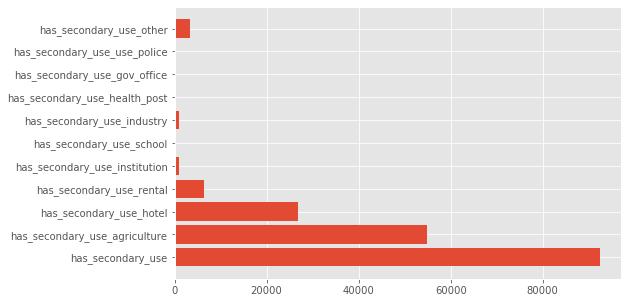

In [8]:
eda.dict_maker(secondary_use_list,building_df)

There are 92364 buildings that also have a secondary use. The majority of the secondary usage of buildings is for agriculture, then as hotels and rentals. The feature `has_secondary_use` can be dropped because it is a place holder for the count of buildings with secondary use. The nature of use is covered by the individual usage features.

In [9]:
drop_list= ['has_secondary_use']

In [10]:
geotech_risk_list = ['has_geotechnical_risk',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_fault_crack',
       'has_geotechnical_risk_liquefaction', 'has_geotechnical_risk_landslide',
       'has_geotechnical_risk_rock_fall', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_other']

{'has_geotechnical_risk': 109647, 'has_geotechnical_risk_land_settlement': 29051, 'has_geotechnical_risk_fault_crack': 40548, 'has_geotechnical_risk_liquefaction': 2130, 'has_geotechnical_risk_landslide': 61074, 'has_geotechnical_risk_rock_fall': 31993, 'has_geotechnical_risk_flood': 8931, 'has_geotechnical_risk_other': 815}


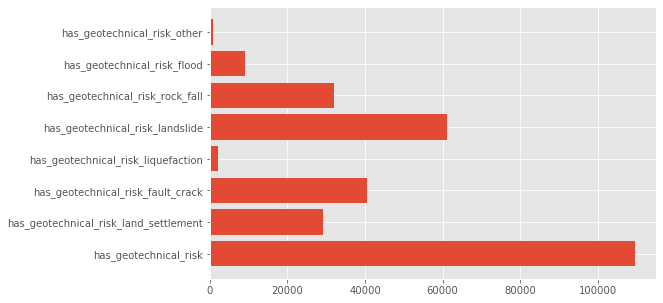

In [11]:
eda.dict_maker(geotech_risk_list, building_df)

In [12]:
building_df['has_geotechnical_risk_landslide'].value_counts(normalize=True)

0    0.919862
1    0.080138
Name: has_geotechnical_risk_landslide, dtype: float64

Geotechnical risk is risk faced by buildings and construction work due to various ground conditions. We can surmise that with some geotechnical risk, the risk of damage to a building from an earthquake goes up. There are 109647 buildings that have some form of geotechnical risk based on where the building stands. 

The majority of the geotechnical risk faced by the buildings in the dataset is risk from landslide. A landslide is defined as the movement of a mass of earth down a slope([source](https://www.usgs.gov/faqs/what-a-landslide-and-what-causes-one?qt-news_science_products=0#qt-news_science_products)). Earthquake shaking can induce landslides in already landslide prone land areas. To learn more about landslides visit the source link. 

Geotechnical risk of fault cracks in the land of the building is faced by 40548 buildings in the dataset. Rock fall is also a significant geological hazard faced by buildings. Another geotechnical hazard is land settlement. Land settlement is defined as the vertical movement of a mass of earth([source](https://www.cmwgeosciences.com/geotechnical-services/ground-settlement)) which is generally caused due to changes in stresses within the earth. Land areas prone so these risks cab be exacerbated by eaerthquake shaking increase the risk of damage to structures found on such land.

Also here, The feature `has_geotechnical_risk` can be added to the drop list because it is a place holder for the count of buildings with any geotechnical risk. The nature of risk is covered by the individual geotechnical risk features.

In [13]:
drop_list.append('has_geotechnical_risk')

In [14]:
superstructure_list= ['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']

{'has_superstructure_adobe_mud': 32314, 'has_superstructure_mud_mortar_stone': 609891, 'has_superstructure_stone_flag': 26766, 'has_superstructure_cement_mortar_stone': 12053, 'has_superstructure_mud_mortar_brick': 17499, 'has_superstructure_cement_mortar_brick': 54510, 'has_superstructure_timber': 197207, 'has_superstructure_bamboo': 61336, 'has_superstructure_rc_non_engineered': 30327, 'has_superstructure_rc_engineered': 12488, 'has_superstructure_other': 9165}


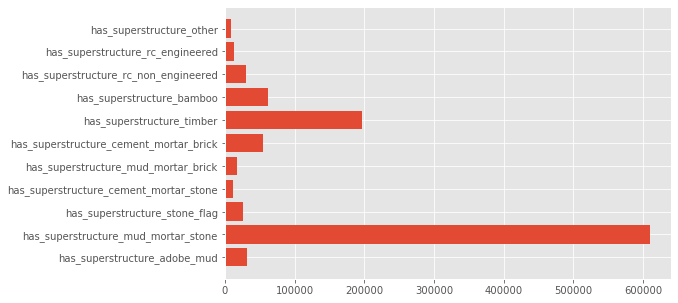

In [15]:
eda.dict_maker(superstructure_list, building_df)

In [16]:
building_df['has_superstructure_mud_mortar_stone'].value_counts(normalize=True)

1    0.800271
0    0.199729
Name: has_superstructure_mud_mortar_stone, dtype: float64

In [17]:
building_df['has_superstructure_timber'].value_counts(normalize=True)

0    0.741234
1    0.258766
Name: has_superstructure_timber, dtype: float64

Superstructure is the structual part of a building found above the foundation or basement. The type of materials used or found in the superstructure can be very telling about the kind of damage a building may have from an earthquake. In the dataset, we find that about 80% of the buildings have a build composition of mud, mortar and stone, with others. Timber is the next heavily used material in building superstructures.

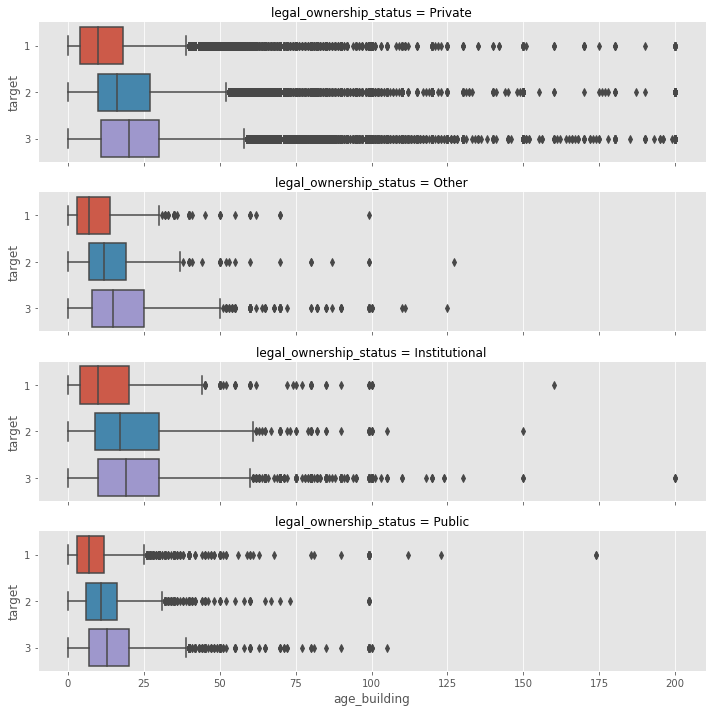

In [18]:
g = sns.catplot(x="age_building", y="target", row="legal_ownership_status",
                kind="box", orient="h", height=2.5, aspect=4,
                data=building_df, )

Privately owned buildings are generally older than other buildings. On average all types of ownership buildings has more Grade 3 prone damage buildings. 96% of the buildings in the dataset are privately owned. 

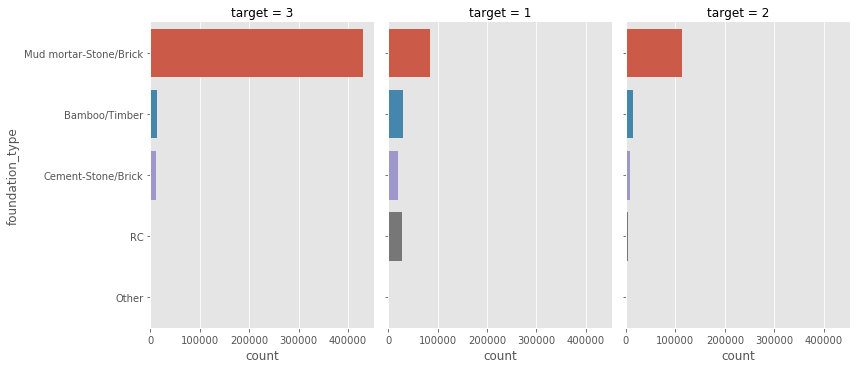

In [19]:
g = sns.catplot(y="foundation_type", col="target",
                col_order=building_df['target'].value_counts().index,
            data=building_df, kind="count",
            height=5, aspect=.8,
                order=building_df['foundation_type'].value_counts().index)

## stacked bar plots

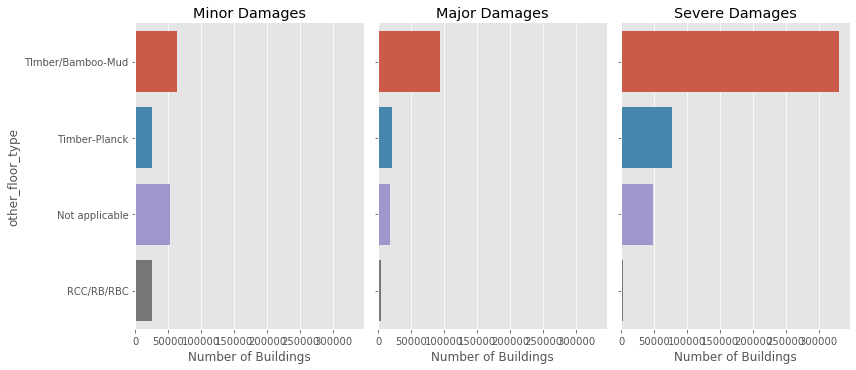

In [20]:
g = sns.catplot(y="other_floor_type", col="target",
                data=building_df, kind="count",height=5, aspect=.8,
               order=building_df['other_floor_type'].value_counts().index)
g.axes[0,0].set_xlabel('Number of Buildings')
g.axes[0,0].set_title('Minor Damages')

g.axes[0,1].set_xlabel('Number of Buildings')
g.axes[0,1].set_title('Major Damages')

g.axes[0,2].set_xlabel('Number of Buildings')
g.axes[0,2].set_title('Severe Damages');


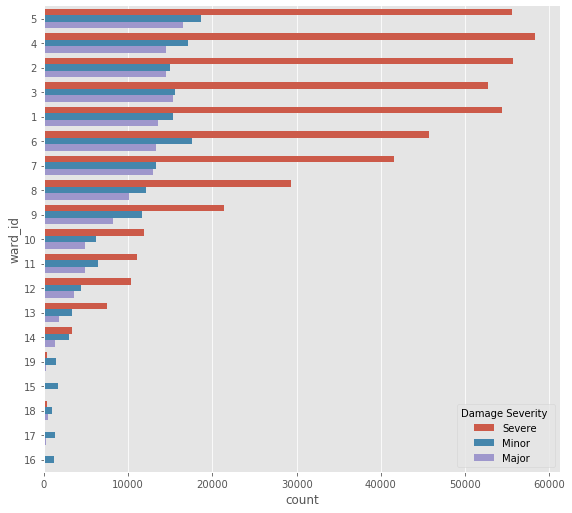

In [21]:
g = sns.catplot(y="ward_id", hue="target",
                hue_order=building_df['target'].value_counts().index,
                data=building_df, kind="count",
                height=7, aspect=1.15,
                order=building_df['ward_id'].value_counts().index, legend=False)
plt.legend(title='Damage Severity ', loc='lower right', labels=['Severe', 'Minor', 'Major'])


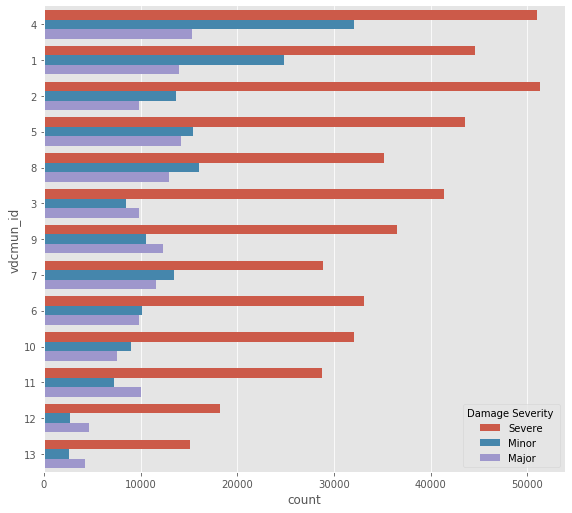

In [22]:
g = sns.catplot(y="vdcmun_id", hue="target",
                hue_order=building_df['target'].value_counts().index,
                data=building_df, kind="count",
                height=7, aspect=1.15,
                order=building_df['vdcmun_id'].value_counts().index, legend=False)
plt.legend(title='Damage Severity ', loc='lower right', labels=['Severe', 'Minor', 'Major'])

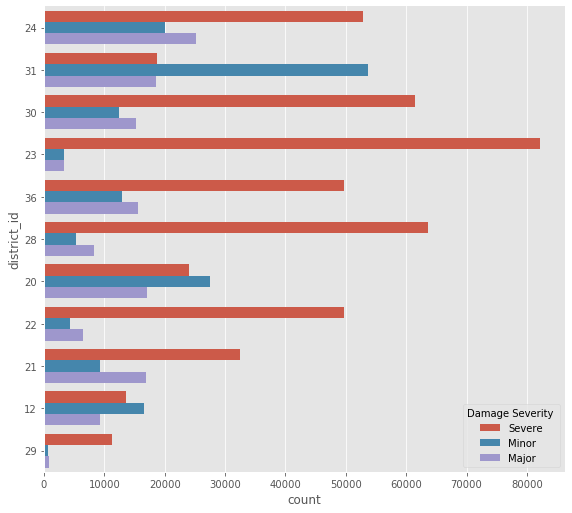

In [23]:
g = sns.catplot(y="district_id", hue="target",
                hue_order=building_df['target'].value_counts().index,
                data=building_df, kind="count",
                height=7, aspect=1.15,
                order=building_df['district_id'].value_counts().index, legend=False)
plt.legend(title='Damage Severity ', loc='lower right', labels=['Severe', 'Minor', 'Major'])

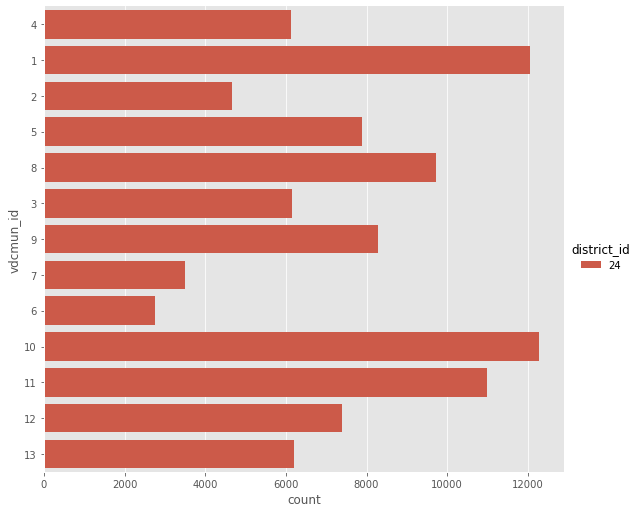

In [24]:
g = sns.catplot(y="vdcmun_id", hue="district_id",
                hue_order=building_df['district_id'].value_counts()[:1].index,
                data=building_df, kind="count",
                height=7, aspect=1.15,
                order=building_df['vdcmun_id'].value_counts().index, legend=True)


In [25]:
grade1_df= building_df.loc[building_df['target']==1]
grade2_df= building_df.loc[building_df['target']==2]
grade3_df= building_df.loc[building_df['target']==3]

In [26]:
# pd.Series.value_counts?

In [27]:
round(grade1_df['foundation_type'].value_counts(normalize=True)*100,2)

Mud mortar-Stone/Brick    51.50
Bamboo/Timber             18.40
RC                        16.70
Cement-Stone/Brick        12.34
Other                      1.07
Name: foundation_type, dtype: float64

In [28]:
grade2_df['foundation_type'].value_counts(sort=False)

RC                          3163
Cement-Stone/Brick          7104
Mud mortar-Stone/Brick    112442
Other                        459
Bamboo/Timber              13244
Name: foundation_type, dtype: int64

In [ ]:
# # Values of each group
# bars1 = 
# bars2 = 
# bars3 = 
 
# # Heights of bars1 + bars2
# bars = np.add(bars1, bars2).tolist()
 
# # The position of the bars on the x-axis
# r = [0,1,2,3,4]
 
# # Names of group and bar width
# names = ['A','B','C','D','E']
# barWidth = 1
 
# # Create brown bars
# plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# # Create green bars (middle), on top of the firs ones
# plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# # Create green bars (top)
# plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# # Custom X axis
# plt.xticks(r, names, fontweight='bold')
# plt.xlabel("group")
 
# # Show graphic
# plt.show()


# plt.bar([building_df['target'],building_df['foundation_type']], stacked=True,)
# plt.show();